In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv("benchmark.csv", parse_dates=['timestamp'])
df = df.drop(df.columns[0], axis=1)
df

,timestamp,nworkers,chunksize,runtime,datasize
0,2018-12-04 11:14:47.842086,1,3,48.501455,1244.16
1,2018-12-04 11:15:29.743114,1,6,41.544004,1244.16
2,2018-12-04 11:16:07.901492,1,12,37.879397,1244.16
3,2018-12-04 11:16:45.810500,1,24,37.710431,1244.16
4,2018-12-04 11:17:22.719290,1,48,36.725775,1244.16
5,2018-12-04 11:18:06.366406,2,3,38.422807,1244.16
6,2018-12-04 11:18:40.473944,2,6,33.785652,1244.16
7,2018-12-04 11:19:13.280861,2,12,32.554676,1244.16
8,2018-12-04 11:19:45.588591,2,24,32.089000,1244.16
9,2018-12-04 11:20:17.526235,2,48,31.755417,1244.16


In [37]:
df_zarr = pd.read_csv("benchmark_zarr.csv", parse_dates=['timestamp'])
df_zarr = df_zarr.drop(df_zarr.columns[0], axis=1)
df_zarr

,timestamp,nworkers,chunksize,runtime,datasize
0,2018-12-04 11:50:37.082122,1,120,15.306760,1244.16
1,2018-12-04 11:50:50.071016,2,120,7.831624,1244.16
2,2018-12-04 11:51:00.658136,4,120,5.377662,1244.16
3,2018-12-04 11:51:10.196044,8,120,4.303904,1244.16
4,2018-12-04 11:51:20.036329,16,120,4.558090,1244.16


In [41]:
# add a few columns of derived data
df['throughput'] = df.datasize / df.runtime
df['chunksize_mb'] = df.datasize / 6000 * df.chunksize
df_zarr['throughput'] = df_zarr.datasize / df_zarr.runtime
df_zarr['chunksize_mb'] = df_zarr.datasize / 6000 * df_zarr.chunksize
zarr_cs = df_zarr.chunksize_mb.values[0]

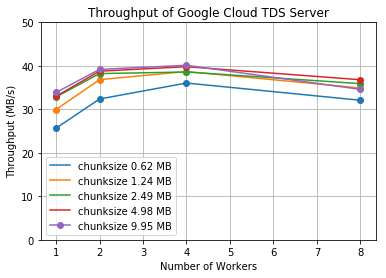

In [44]:
fig, ax = plt.subplots()

for name, group in df.groupby('chunksize_mb'):
    group.plot(x='nworkers', y='throughput',
               marker='o',
               label=f'chunksize {name:3.2f} MB', ax=ax)

ax.set_xlabel('Number of Workers')
ax.set_ylabel('Throughput (MB/s)')
ax.set_ylim([0, 50])
ax.grid()
ax.set_title('Throughput of Google Cloud TDS Server')

fig.savefig('thredds_throughput.pdf')

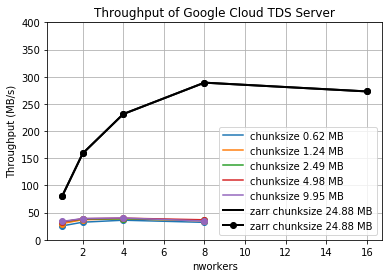

In [46]:
df_zarr.plot(x='nworkers', y='throughput', ax=ax,
             label=f'zarr chunksize {zarr_cs:3.2f} MB',
             color='k', marker='o', linewidth=2)
ax.set_ylim([0, 400])
ax.grid()
display(fig)